In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

In [2]:
from merge_years.import_data import get_full_data


In [3]:
!cd ..

In [4]:
raw_data=get_full_data('../raw_data')

In [5]:
raw_data.shape

(114992, 40)

In [6]:
raw_data = raw_data[raw_data.name != 'ben davies']
print(raw_data.shape)
#raw_data = raw_data[raw_data.name != 'danny ward']
#raw_data.shape

(114730, 40)


In [7]:
raw_data[raw_data['position'].isnull()]


,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,yellow_cards,GW,season,position,dreamteam_yearly_average,team_id,team_name,opponent_level,team_level,kickoff_date
17205,caglar söyüncü,0,0,0,0,0.0,515,6,0,0,...,0,1,19,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-10
17206,caglar söyüncü,0,0,0,0,0.0,515,17,0,0,...,0,2,19,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-18
17207,caglar söyüncü,0,0,0,0,0.0,515,28,0,0,...,0,3,19,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-25
17208,caglar söyüncü,0,0,0,0,0.0,515,37,0,0,...,0,4,19,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-01
17209,caglar söyüncü,0,0,0,0,0.0,515,41,0,0,...,0,5,19,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-15
17210,caglar söyüncü,0,0,0,0,0.0,515,57,0,0,...,0,6,19,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-22
17211,caglar söyüncü,0,0,0,0,0.0,515,68,0,0,...,0,7,19,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-29
17212,caglar söyüncü,0,0,0,0,0.0,515,75,0,0,...,0,8,19,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-06
17213,caglar söyüncü,0,0,0,0,0.0,515,81,0,0,...,0,9,19,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-22
17214,caglar söyüncü,0,0,6,0,0.9,515,95,1,0,...,1,10,19,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-27


In [8]:
j=0
for i,row in raw_data.iterrows():
    if row['name']=='caglar söyüncü':
        print(j)
        raw_data['position'].at[i]='DEF'
        j+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [9]:
raw_data.isnull().sum().sort_values(ascending=False)

dreamteam_yearly_average    96163
team_level                  67898
opponent_level              67898
team_name                   67898
team_id                     67898
team_a_score                   59
team_h_score                   59
transfers_out                   0
threat                          0
total_points                    0
transfers_balance               0
transfers_in                    0
name                            0
value                           0
was_home                        0
assists                         0
GW                              0
season                          0
position                        0
yellow_cards                    0
selected                        0
saves                           0
goals_scored                    0
bonus                           0
bps                             0
clean_sheets                    0
creativity                      0
element                         0
fixture                         0
goals_conceded

In [10]:
raw_data.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW', 'season', 'position',
       'dreamteam_yearly_average', 'team_id', 'team_name', 'opponent_level',
       'team_level', 'kickoff_date'],
      dtype='object')

In [11]:
'aaron connolly' in raw_data[raw_data['season']==21]['name'].unique()

True

# Feature engineering

In [12]:
raw_data.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW', 'season', 'position',
       'dreamteam_yearly_average', 'team_id', 'team_name', 'opponent_level',
       'team_level', 'kickoff_date'],
      dtype='object')

In [13]:
raw_data.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,yellow_cards,GW,season,position,dreamteam_yearly_average,team_id,team_name,opponent_level,team_level,kickoff_date
0,aaron connolly,0,0,1,0,0.1,534,37,1,0,...,0,4,20,FWD,NaN,4.0,Brighton,1330.0,1010.0,2019-08-31
1,aaron connolly,0,0,1,0,0.3,534,43,1,0,...,0,5,20,FWD,NaN,4.0,Brighton,1180.0,1050.0,2019-09-14
2,aaron connolly,0,0,1,0,4.8,534,58,0,0,...,0,6,20,FWD,NaN,4.0,Brighton,1090.0,1010.0,2019-09-21
3,aaron connolly,0,0,2,0,0.6,534,63,1,0,...,0,7,20,FWD,NaN,4.0,Brighton,1220.0,1010.0,2019-09-28
4,aaron connolly,0,3,53,1,23.8,534,72,0,2,...,0,8,20,FWD,NaN,4.0,Brighton,1240.0,1050.0,2019-10-05


In [14]:
features = ['name','assists','bps','clean_sheets','goals_scored',
            'opponent_level','transfers_balance','was_home','position',
           'saves','kickoff_time','value','dreamteam_yearly_average','GW','season','total_points','kickoff_date']
subset_df = raw_data[features]

In [15]:
subset_df.head()

,name,assists,bps,clean_sheets,goals_scored,opponent_level,transfers_balance,was_home,position,saves,kickoff_time,value,dreamteam_yearly_average,GW,season,total_points,kickoff_date
0,aaron connolly,0,1,0,0,1330.0,0,False,FWD,0,14:00:00,45,NaN,4,20,1,2019-08-31
1,aaron connolly,0,1,0,0,1180.0,10589,True,FWD,0,14:00:00,45,NaN,5,20,1,2019-09-14
2,aaron connolly,0,1,0,0,1090.0,8090,False,FWD,0,16:30:00,45,NaN,6,20,1,2019-09-21
3,aaron connolly,0,2,0,0,1220.0,8437,False,FWD,0,14:00:00,45,NaN,7,20,1,2019-09-28
4,aaron connolly,0,53,1,2,1240.0,2156,True,FWD,0,11:30:00,45,NaN,8,20,13,2019-10-05


In [16]:
time=[]
for row in subset_df['kickoff_time']:
    time.append(row.hour)
subset_df['time']=time

<ipython-input-16-512bf060e1e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['time']=time


In [17]:
subset_df.drop(columns='kickoff_time',inplace=True)

/Users/admin/.pyenv/versions/3.8.6/envs/fflpred/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
subset_df

,name,assists,bps,clean_sheets,goals_scored,opponent_level,transfers_balance,was_home,position,saves,value,dreamteam_yearly_average,GW,season,total_points,kickoff_date,time
0,aaron connolly,0,1,0,0,1330.0,0,False,FWD,0,45,NaN,4,20,1,2019-08-31,14
1,aaron connolly,0,1,0,0,1180.0,10589,True,FWD,0,45,NaN,5,20,1,2019-09-14,14
2,aaron connolly,0,1,0,0,1090.0,8090,False,FWD,0,45,NaN,6,20,1,2019-09-21,16
3,aaron connolly,0,2,0,0,1220.0,8437,False,FWD,0,45,NaN,7,20,1,2019-09-28,14
4,aaron connolly,0,53,1,2,1240.0,2156,True,FWD,0,45,NaN,8,20,13,2019-10-05,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114987,ørjan nyland,0,0,0,0,1320.0,-2960,True,GK,0,40,0.0,35,21,0,2021-05-09,13
114988,ørjan nyland,0,0,0,0,1130.0,-2960,True,GK,0,40,0.0,35,21,0,2021-05-13,17
114989,ørjan nyland,0,0,0,0,1090.0,-1358,False,GK,0,40,0.0,36,21,0,2021-05-16,11
114990,ørjan nyland,0,0,0,0,1190.0,-1782,False,GK,0,40,0.0,37,21,0,2021-05-19,17


In [19]:
rolling_features=['name','assists','bps','clean_sheets','goals_scored','opponent_level',
                   'transfers_balance','was_home','saves','value','total_points','time']
#missing position, dreamteam, GW, Season



In [20]:
rolling_df=subset_df[rolling_features].groupby('name').rolling(5,closed = 'left').mean()

In [21]:
rolling_df.head(10)

assists   bps  clean_sheets  goals_scored  opponent_level  \
name                                                                          
aaron connolly 0      NaN   NaN           NaN           NaN             NaN   
               1      NaN   NaN           NaN           NaN             NaN   
               2      NaN   NaN           NaN           NaN             NaN   
               3      NaN   NaN           NaN           NaN             NaN   
               4      NaN   NaN           NaN           NaN             NaN   
               5      0.0  11.6           0.2           0.4          1212.0   
               6      0.0  12.0           0.2           0.4          1150.0   
               7      0.4  16.2           0.2           0.4          1162.0   
               8      0.4  16.4           0.4           0.4          1148.0   
               9      0.4  15.0           0.4           0.4          1148.0   

                  transfers_balance  was_home  saves  value  total_points  \
name                                                                        
aaron connolly 0                NaN       NaN    NaN    NaN           NaN   
               1                NaN       NaN    NaN    NaN           NaN   
               2                NaN       NaN    NaN    NaN           NaN   
               3                NaN       NaN    NaN    NaN           NaN   
               4                NaN       NaN    NaN    NaN           NaN   
               5             5854.4       0.4    0.0   45.0           3.4   
               6            20014.8       0.4    0.0   45.0           3.4   
               7            24890.8       0.4    0.0   45.2           4.8   
               8            45102.4       0.6    0.0   45.4           5.0   
               9            41238.2       0.6    0.0   45.8           5.0   

                  time  
name                    
aaron connolly 0   NaN  
               1   NaN  
               2   NaN  
               3   NaN  
               4   NaN  
               5  13.8  
               6  13.8  
               7  13.8  
               8  13.6  
               9  13.6

In [22]:
rolling_df.rename(columns={'total_points':'rolling_points'},inplace=True)


result = map(lambda position:position, subset_df['position'])
rolling_df['position']=list(result)

result = map(lambda position:position, subset_df['dreamteam_yearly_average'])
rolling_df['dreamteam_yearly_average']=list(result)

result = map(lambda position:position, subset_df['GW'])
rolling_df['GW']=list(result)

result = map(lambda position:position, subset_df['season'])
rolling_df['season']=list(result)

result = map(lambda position:position, subset_df['total_points'])
rolling_df['total_points']=list(result)

result = map(lambda position:position, subset_df['kickoff_date'])
rolling_df['kickoff_date']=list(result)

In [23]:
rolling_df.tail()


assists  bps  clean_sheets  goals_scored  opponent_level  \
name                                                                            
ørjan nyland 114987      0.0  0.0           0.0           0.0          1200.0   
             114988      0.0  0.0           0.0           0.0          1244.0   
             114989      0.0  0.0           0.0           0.0          1220.0   
             114990      0.0  0.0           0.0           0.0          1166.0   
             114991      0.0  0.0           0.0           0.0          1196.0   

                     transfers_balance  was_home  saves  value  \
name                                                             
ørjan nyland 114987            -2618.2       0.6    0.0   40.0   
             114988            -2520.6       0.6    0.0   40.0   
             114989            -2457.4       0.8    0.0   40.0   
             114990            -2271.6       0.6    0.0   40.0   
             114991            -2110.6       0.4    0.0   40.0   

                     rolling_points  time position  dreamteam_yearly_average  \
name                                                                           
ørjan nyland 114987             0.0  17.0       GK                       0.0   
             114988             0.0  16.6       GK                       0.0   
             114989             0.0  17.2       GK                       0.0   
             114990             0.0  15.6       GK                       0.0   
             114991             0.0  15.4       GK                       0.0   

                     GW  season  total_points kickoff_date  
name                                                        
ørjan nyland 114987  35      21             0   2021-05-09  
             114988  35      21             0   2021-05-13  
             114989  36      21             0   2021-05-16  
             114990  37      21             0   2021-05-19  
             114991  38      21             0   2021-05-23

In [24]:
len(rolling_df['assists'].dropna())

107275

In [25]:
not_processed_df_name=rolling_df.dropna(subset=['assists'])

In [26]:
not_processed_df=not_processed_df_name.reset_index()

In [27]:
player_dtya={}
for i,player in enumerate(not_processed_df['name'].unique()):
    player_dtya[player]=not_processed_df[not_processed_df['name']==player]['dreamteam_yearly_average'].max()
    if i%100==0:
        print(player,i)

aaron connolly 0
andrew robertson 100
bradley smith 200
cuco martina 300
eberechi eze 400
george baldock 500
jacob murphy 600
joel matip 700
kamil miazek 800
lukas nmecha 900
matty james 1000
nordin amrabat 1100
rhys williams 1200
shinji okazaki 1300
tyreke johnson 1400


In [28]:
ls=[]
for i,row in not_processed_df.iterrows():
    ls.append(player_dtya[row['name']])
not_processed_df['dreamteam_yearly_average']=ls

In [29]:
not_processed_df.head(350)

,name,level_1,assists,bps,clean_sheets,goals_scored,opponent_level,transfers_balance,was_home,saves,value,rolling_points,time,position,dreamteam_yearly_average,GW,season,total_points,kickoff_date
0,aaron connolly,5,0.0,11.6,0.2,0.4,1212.0,5854.4,0.4,0.0,45.0,3.4,13.8,FWD,7.0,9,20,1,2019-10-19
1,aaron connolly,6,0.0,12.0,0.2,0.4,1150.0,20014.8,0.4,0.0,45.0,3.4,13.8,FWD,7.0,10,20,8,2019-10-26
2,aaron connolly,7,0.4,16.2,0.2,0.4,1162.0,24890.8,0.4,0.0,45.2,4.8,13.8,FWD,7.0,11,20,2,2019-11-02
3,aaron connolly,8,0.4,16.4,0.4,0.4,1148.0,45102.4,0.6,0.0,45.4,5.0,13.6,FWD,7.0,12,20,1,2019-11-10
4,aaron connolly,9,0.4,15.0,0.4,0.4,1148.0,41238.2,0.6,0.0,45.8,5.0,13.6,FWD,7.0,13,20,0,2019-11-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,aaron lennon,360,0.0,1.8,0.0,0.0,NaN,-4409.4,0.4,0.0,50.0,0.4,15.0,MID,NaN,22,19,0,2019-01-12
346,aaron lennon,361,0.0,0.0,0.0,0.0,NaN,-3952.0,0.6,0.0,49.8,0.0,15.0,MID,NaN,23,19,0,2019-01-19
347,aaron lennon,362,0.0,0.0,0.0,0.0,NaN,-3160.4,0.6,0.0,49.6,0.0,15.6,MID,NaN,24,19,0,2019-01-29
348,aaron lennon,363,0.0,0.0,0.0,0.0,NaN,-2124.8,0.4,0.0,49.4,0.0,16.6,MID,NaN,25,19,0,2019-02-02


In [30]:
not_processed_df.isnull().sum().sort_values(ascending=False)

opponent_level              65014
dreamteam_yearly_average    46587
name                            0
value                           0
total_points                    0
season                          0
GW                              0
position                        0
time                            0
rolling_points                  0
saves                           0
level_1                         0
was_home                        0
transfers_balance               0
goals_scored                    0
clean_sheets                    0
bps                             0
assists                         0
kickoff_date                    0
dtype: int64

In [79]:

feature_selected_df=not_processed_df.dropna().drop(columns=['level_1','season'])#season

In [80]:
feature_selected_df.isnull().sum().sort_values(ascending=False)

name                        0
value                       0
total_points                0
GW                          0
dreamteam_yearly_average    0
position                    0
time                        0
rolling_points              0
saves                       0
assists                     0
was_home                    0
transfers_balance           0
opponent_level              0
goals_scored                0
clean_sheets                0
bps                         0
kickoff_date                0
dtype: int64

In [81]:
feature_selected_df.shape

(31735, 17)

# Preprocessing

In [82]:
feature_selected_df.head(550)

,name,assists,bps,clean_sheets,goals_scored,opponent_level,transfers_balance,was_home,saves,value,rolling_points,time,position,dreamteam_yearly_average,GW,total_points,kickoff_date
0,aaron connolly,0.0,11.6,0.2,0.4,1212.0,5854.4,0.4,0.0,45.0,3.4,13.8,FWD,7.00,9,1,2019-10-19
1,aaron connolly,0.0,12.0,0.2,0.4,1150.0,20014.8,0.4,0.0,45.0,3.4,13.8,FWD,7.00,10,8,2019-10-26
2,aaron connolly,0.4,16.2,0.2,0.4,1162.0,24890.8,0.4,0.0,45.2,4.8,13.8,FWD,7.00,11,2,2019-11-02
3,aaron connolly,0.4,16.4,0.4,0.4,1148.0,45102.4,0.6,0.0,45.4,5.0,13.6,FWD,7.00,12,1,2019-11-10
4,aaron connolly,0.4,15.0,0.4,0.4,1148.0,41238.2,0.6,0.0,45.8,5.0,13.6,FWD,7.00,13,0,2019-11-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,adam lallana,0.0,1.8,0.0,0.0,1164.0,-239.0,0.4,0.0,62.0,0.6,17.6,MID,0.75,24,1,2021-02-13
1744,adam lallana,0.0,3.8,0.0,0.0,1164.0,-177.2,0.6,0.0,62.0,0.8,18.6,MID,0.75,25,1,2021-02-22
1745,adam lallana,0.0,4.2,0.0,0.0,1166.0,-80.4,0.6,0.0,62.0,1.0,18.8,MID,0.75,26,1,2021-02-27
1746,adam lallana,0.0,4.4,0.0,0.0,1126.0,-47.0,0.4,0.0,62.0,1.0,18.0,MID,0.75,27,9,2021-03-06


In [83]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder()

enc.fit(feature_selected_df[['position']])

#enc.categories_
#order for position is ['DEF','FWD','GK','MID']
positions=enc.transform(feature_selected_df[['position']]).toarray()
feature_selected_df["DEF"],feature_selected_df["FWD"],feature_selected_df['GK'], feature_selected_df['MID'] = positions.T 

feature_selected_df.head(500)

,name,assists,bps,clean_sheets,goals_scored,opponent_level,transfers_balance,was_home,saves,value,...,time,position,dreamteam_yearly_average,GW,total_points,kickoff_date,DEF,FWD,GK,MID
0,aaron connolly,0.0,11.6,0.2,0.4,1212.0,5854.4,0.4,0.0,45.0,...,13.8,FWD,7.00,9,1,2019-10-19,0.0,1.0,0.0,0.0
1,aaron connolly,0.0,12.0,0.2,0.4,1150.0,20014.8,0.4,0.0,45.0,...,13.8,FWD,7.00,10,8,2019-10-26,0.0,1.0,0.0,0.0
2,aaron connolly,0.4,16.2,0.2,0.4,1162.0,24890.8,0.4,0.0,45.2,...,13.8,FWD,7.00,11,2,2019-11-02,0.0,1.0,0.0,0.0
3,aaron connolly,0.4,16.4,0.4,0.4,1148.0,45102.4,0.6,0.0,45.4,...,13.6,FWD,7.00,12,1,2019-11-10,0.0,1.0,0.0,0.0
4,aaron connolly,0.4,15.0,0.4,0.4,1148.0,41238.2,0.6,0.0,45.8,...,13.6,FWD,7.00,13,0,2019-11-23,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,adam lallana,0.0,8.0,0.0,0.2,1164.0,-41.4,0.4,0.0,58.0,...,14.2,MID,0.75,12,0,2019-11-10,0.0,0.0,0.0,1.0
1694,adam lallana,0.0,8.0,0.0,0.2,1196.0,34.8,0.6,0.0,58.0,...,15.2,MID,0.75,13,0,2019-11-23,0.0,0.0,0.0,1.0
1695,adam lallana,0.0,7.4,0.0,0.2,1190.0,75.8,0.4,0.0,58.0,...,15.4,MID,0.75,14,1,2019-11-30,0.0,0.0,0.0,1.0
1696,adam lallana,0.0,3.6,0.0,0.0,1148.0,71.6,0.6,0.0,58.0,...,15.4,MID,0.75,15,2,2019-12-04,0.0,0.0,0.0,1.0


In [84]:
final_df=feature_selected_df.drop(columns='position')

In [85]:
final_df

,name,assists,bps,clean_sheets,goals_scored,opponent_level,transfers_balance,was_home,saves,value,rolling_points,time,dreamteam_yearly_average,GW,total_points,kickoff_date,DEF,FWD,GK,MID
0,aaron connolly,0.0,11.6,0.2,0.4,1212.0,5854.4,0.4,0.0,45.0,3.4,13.8,7.0,9,1,2019-10-19,0.0,1.0,0.0,0.0
1,aaron connolly,0.0,12.0,0.2,0.4,1150.0,20014.8,0.4,0.0,45.0,3.4,13.8,7.0,10,8,2019-10-26,0.0,1.0,0.0,0.0
2,aaron connolly,0.4,16.2,0.2,0.4,1162.0,24890.8,0.4,0.0,45.2,4.8,13.8,7.0,11,2,2019-11-02,0.0,1.0,0.0,0.0
3,aaron connolly,0.4,16.4,0.4,0.4,1148.0,45102.4,0.6,0.0,45.4,5.0,13.6,7.0,12,1,2019-11-10,0.0,1.0,0.0,0.0
4,aaron connolly,0.4,15.0,0.4,0.4,1148.0,41238.2,0.6,0.0,45.8,5.0,13.6,7.0,13,0,2019-11-23,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107270,ørjan nyland,0.0,0.0,0.0,0.0,1200.0,-2618.2,0.6,0.0,40.0,0.0,17.0,0.0,35,0,2021-05-09,0.0,0.0,1.0,0.0
107271,ørjan nyland,0.0,0.0,0.0,0.0,1244.0,-2520.6,0.6,0.0,40.0,0.0,16.6,0.0,35,0,2021-05-13,0.0,0.0,1.0,0.0
107272,ørjan nyland,0.0,0.0,0.0,0.0,1220.0,-2457.4,0.8,0.0,40.0,0.0,17.2,0.0,36,0,2021-05-16,0.0,0.0,1.0,0.0
107273,ørjan nyland,0.0,0.0,0.0,0.0,1166.0,-2271.6,0.6,0.0,40.0,0.0,15.6,0.0,37,0,2021-05-19,0.0,0.0,1.0,0.0


# Make model

In [86]:
X=final_df.drop(columns='total_points')
y=final_df['total_points']

In [87]:
X.drop(columns=['name','GW','kickoff_date'],inplace=True)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [89]:
X_test.shape

(9521, 16)

In [90]:
X_train.shape

(22214, 16)

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

reg = GradientBoostingRegressor(random_state=0,loss='ls')
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)


1.3930297348993113

In [92]:
for i,value in enumerate(y_pred):
    print(y_test.iloc[i],value)


2 2.2288196577746113
1 4.295981710806087
0 1.9105920159502705
0 1.4251846036415976
0 0.3991093032160909
0 0.12698837961417136
2 2.361395159288065
0 0.2530618372056633
0 2.1780216218349433
0 0.37851860059686593
14 2.5873968719973712
0 3.4225635024459073
1 1.9244547655834714
0 0.7846121062660313
0 0.9113957497898001
1 2.2999374851978147
1 2.3176576109329985
1 1.3956733687716572
1 2.4441445091399623
0 2.4092675146660003
1 0.42442709278269763
0 0.3912019737774384
1 2.6128545125508746
2 2.522501289788866
1 4.466219797459563
2 2.7943616865581036
0 0.040488887038781
2 5.322211824686958
0 0.21689217230942515
0 0.06950660771364277
0 0.07769423350250251
0 0.06950660771364277
2 0.983477229261981
6 1.7914671413009382
2 2.226416841537502
0 0.2093342934184153
0 0.10553912953948993
0 0.1369637767862948
1 1.044640820615811
1 1.5184596332335756
1 2.8740917868362854
0 0.6711262407084752
4 4.5014715253624304
6 3.081169473871697
9 2.017608799602575
6 3.5950042475154813
0 0.045363334705446075
0 1.424295462

0 0.5026525246445209
2 3.33542820032172
2 1.4441331976965017
0 1.0283191381802332
0 0.0895446866524261
3 3.582551954982073
1 2.2328914580546586
6 2.512966758706581
2 3.6814767901417857
0 2.4161629312228157
0 3.132860010514098
0 0.05092009648658662
0 1.1565617126394125
9 3.6080353300460217
1 3.1931336365860785
0 0.618135887292986
0 0.06950660771364277
0 0.12525267491523032
1 2.297094519990116
8 3.632761275744072
0 0.29161195033640225
0 0.2706223578198704
0 0.025010413908123467
3 1.5425516228925011
0 0.09262232989748974
0 0.2530618372056633
0 1.1603900526380582
0 0.15078792650219452
1 2.5244591588665917
0 1.0550449930900436
3 1.9535395078632662
0 0.11265312133154863
0 0.1732864689176141
1 0.41809802977847016
1 3.3763320451886742
1 1.4492570505941826
0 1.4877503641525902
0 0.3659982666354443
1 2.483975141030444
0 3.0770326525705247
1 2.89594845597348
2 2.4293886538450633
0 0.07623788605319336
-2 2.7645004383460345
0 0.1573636702754371
0 0.16347052795563521
1 0.17057425070062085
0 0.824405

2 2.018396222744026
1 0.5054938207430211
0 0.0024850245246322575
3 2.789590336777712
0 0.020045545138839372
0 1.797140028025775
0 0.03701289890092793
0 1.6823799188096833
0 1.7639714618175588
2 0.9894510649242358
2 2.5123711765979304
1 3.2199180244175607
0 0.0998818983749086
2 1.8330433873021936
0 0.7556652225973578
0 2.7289736178487347
6 2.5616963297463227
0 0.06950660771364277
0 1.5657121870676987
1 3.2133968370123376
0 0.044129726824047685
0 0.044129726824047685
0 0.20175534104514314
1 3.71253682828781
9 3.912579738936755
0 0.1672995112742397
2 1.8090858319535834
0 0.20531071084082345
0 0.15694034675001364
2 3.1698061646574596
0 2.761695547461583
0 0.056132211816852184
0 0.16507130233220954
2 2.775751935861199
6 2.042186715084179
2 4.06595753287716
1 0.9399444457714093
0 0.1369637767862948
0 0.023638503004137355
2 2.206369939123468
0 1.8146323211243878
0 0.1577463837279452
1 2.4294394292783843
10 2.0722930992130095
0 1.0580066618782475
0 0.09299409814257008
0 2.2005913783274527
0 2.

3 2.1705907936857627
7 2.8640481758897987
0 1.536962144676231
0 1.7467605544751503
0 0.0024850245246322575
0 0.2666503217240521
0 0.1377154941087118
0 1.2950501587224543
1 2.518671797318138
1 2.6012942027454278
0 0.933957488128035
12 2.582831840140519
0 2.038265984445118
3 3.089229069234677
2 2.46977780317639
0 0.42998321056750044
0 1.902322492133898
1 0.6958855768880718
0 0.08055106645167619
2 3.72801458649521
1 1.844751380882589
0 1.2020169564660144
0 0.7064250936004285
1 2.0319160848334525
0 0.2917875499317778
1 1.9731231125639332
2 2.678901885228551
5 6.582350774810755
0 2.074240626804576
2 2.7700274105077853
0 0.07456410880830186
0 5.466016886509394
2 3.123399949077644
0 0.11518433648798308
0 0.10437699521637987
1 1.7008263053520523
0 0.3502827801729389
1 0.2885304497385909
6 2.4258685053902993
1 1.1571805996421323
0 0.1541490866159219
1 2.1002378166546225
0 0.05092009648658662
2 1.790388919134006
0 0.16183660590939444
0 0.1577463837279452
10 2.335856288633312
0 0.1185102934809920

0 0.7669673013679361
0 0.14574389873514074
0 0.3200834203946738
0 0.2852996119936261
0 0.8331380966271963
2 0.5632941253609841
2 2.3938102282391314
0 0.09482439728024951
2 0.8422152270583957
0 0.03348466639486993
2 2.3659407842535938
1 2.3604339301143233
0 2.284854766899703
2 2.204575086783438
0 0.13323488604605516
0 0.33112787913270725
5 1.5124180878583733
1 1.9819659469662698
0 1.9857336712243159
2 2.9939687641319166
0 0.16185876711690844
3 2.3636460684214
0 0.9097377654567116
0 1.2686724720697444
0 1.5168024021146271
5 2.9601200603589706
2 2.1284661715537263
0 0.08282191228744502
0 0.11543492288415548
3 0.8611665806416523
2 3.4338105750032697
1 2.381933531883752
1 2.006856315248687
1 0.7056758145241856
0 0.7802661451609533
1 0.5317993405114475
1 0.9460804110102741
0 0.7782588739434846
0 0.07350694425083541
0 0.3787648329973086
0 1.646360243485544
0 0.1927111572571417
11 2.8994866664462076
0 1.2285053865379483
0 0.12698837961417136
0 0.8199282622743405
0 0.3193341413184312
1 2.739148

1 0.5962778979779644
1 2.5040484320017273
3 1.3659876355759035
0 0.04818915468422867
2 2.3236082142950623
2 2.2916971487339435
0 0.056132211816852184
0 3.571813995142003
0 1.2057897265698647
0 2.966337125347492
0 0.15230616918077808
2 2.4562105556917198
2 2.1828175236684375
0 0.06950660771364277
0 0.7394549715152295
2 2.4879055716351366
0 2.9430160037637223
0 0.11124211265918527
1 1.5609023007351368
1 2.38233275530323
2 4.009256804189367
2 1.984883132883108
1 1.3355062123279797
0 0.1020399193607965
2 2.14699710438775
0 0.14315570865587893
0 0.28395982360118666
2 3.6505901203017213
7 2.2949974829274393
0 0.19172664345358068
3 2.0975060183191685
1 1.4520856956133248
2 1.3431891839347747
9 2.1339149741792878
0 0.6200729138959227
0 0.16125911046946906
0 0.1940703379022434
1 2.8604308773810216
0 0.056132211816852184
1 1.183715376144329
2 1.6661172442549133
0 1.959359134053972
0 1.7774473736071823
0 0.23264598852487767
0 0.2067842267096953
4 1.7726784394408477
6 1.2066881010376493
1 2.908065

2 3.61074802151183
0 0.043498396225114304
2 1.4192477845918592
0 0.8539318238248519
6 3.3107490833358146
1 2.365924938236457
0 0.3200834203946738
1 2.3114027109697783
1 1.9944985913138482
6 2.8728696585918114
1 2.032449215258565
0 0.13323488604605516
0 1.4779707170514171
0 0.21465460792875873
0 0.13629713365326376
2 1.8431416351361403
2 4.136514088125062
6 2.496376185077715
1 0.8986933067186782
1 1.5669433555857046
0 0.8727567127705191
1 0.7208474508962844
9 2.125904329615632
1 1.9787543132535705
0 0.5563317659401785
0 0.023638503004137355
0 0.3340310349416644
2 0.6044883105435185
2 1.228686274906952
1 3.3295879154726697
0 0.0575041227208383
3 2.739449775926536
1 2.2479371544920927
0 0.2750395356382447
2 1.0139646124320312
4 2.174573207750153
0 2.8516251963209314
0 0.3160415923054856
1 2.168286526655283
8 2.7197853529672087
2 2.0609322588283274
0 4.0857195901343255
1 2.3378516801654246
0 0.5507733653073805
10 1.8006884045631604
0 0.13371965795372193
0 0.12698837961417136
0 0.1058688560

0 0.1010656018717567
0 0.1927111572571417
2 3.5840906824702565
0 3.819310732940911
0 1.3914312795308594
11 2.8446776917393417
0 0.9464066175555714
1 3.5184974689787842
2 0.08994994961358442
0 0.09482439728024951
0 0.5903959252120685
3 3.733192496392065
2 1.650992430249779
1 1.5933054763342107
2 3.141017719872372
0 0.006671149242048748
5 2.91469011891709
3 1.9402221620310196
0 1.7901475837113192
6 10.296944566133092
0 3.2551694772588937
2 2.0307203039283146
0 3.111615857569443
0 0.1976231915473509
2 5.808552911823951
2 2.620779208261797
2 2.0938683397181137
4 1.8420724724273532
6 2.738953465136375
0 0.2337875104184656
2 2.958803939370864
0 0.28608399437627813
6 2.504742178941146
1 0.7962483165796634
9 2.574499114652792
0 0.2730241150449786
2 0.49142665492652005
0 1.0843136991890754
3 2.447331281251367
0 1.9584812753463692
0 0.47746461181511307
0 0.4932915934068518
1 3.1077326351290675
2 2.4522227916737673
1 2.0178017449197614
0 0.39477568620646125
2 3.0074946167310377
0 0.16335062791881

0 0.1633506279188115
0 0.08528458599176755
1 2.0030614759047496
0 0.0024850245246322575
6 3.654426606488834
1 1.197289217875741
2 2.0231671761880827
2 2.9270944051972823
1 1.0557003644394005
0 1.7120157402577585
0 0.16128398392480964
7 2.332859615700596
0 1.150190062634222
1 2.332304531403431
0 2.096460830679484
6 2.599265078941983
8 1.9518327130141342
2 1.8633587227471389
3 2.189131082801343
2 0.9705347583237005
2 3.0676699147880617
0 0.8875105309105992
0 1.1445820577926513
0 0.08055106645167619
2 2.908011374488252
3 2.3559057728822608
0 1.2911680397594216
0 0.5539565046544682
0 0.7223521451201386
0 0.21465460792875873
0 0.3193341413184312
0 0.2036101491907253
0 0.0768349546440707
0 0.09482439728024951
0 0.1647933974154379
1 0.7691019651417828
0 0.09482439728024951
8 2.9401987663309113
1 1.5328902612169422
0 0.14631921153740368
0 1.3153632826940527
2 0.40827413957114195
0 2.6372906333200543
8 1.6701870647386514
0 0.10586885601828293
6 2.799442442016236
0 0.34898379284156505
2 3.518107

0 0.5598009518575765
0 1.0398499692644048
0 0.1577463837279452
0 0.21702181271188786
0 2.427616964480209
0 2.0613645506380207
2 2.307026081165091
1 2.8589532051300606
1 2.5215637094434378
1 2.3961351830397244
1 0.9753473157437468
1 2.5299720100016034
0 1.3756956749391012
0 5.357189509554273
1 2.089063511832206
1 0.9246864991893388
0 0.13323488604605516
0 0.07752731703936792
0 0.027802814091238966
0 0.11769229979018213
0 0.3917094148477742
2 3.009319311730052
0 0.11498589462136687
0 1.0832440131759424
1 3.251293972508834
2 1.832345819779817
2 2.1482461835698636
0 1.453166068348886
1 0.30549274532260745
0 0.9448363684824804
0 0.24949888648377172
7 3.684822166926424
6 1.9928056170466137
3 3.2136994251883872
0 0.6469686406637558
0 2.5119869432174124
8 1.8129615109409767
0 0.04818915468422867
2 1.8654720127277278
0 0.0998818983749086
0 0.1263121979182246
3 1.5615452747650662
0 0.08282191228744502
8 3.9383385030735973
0 0.1377154941087118
4 2.7654220998553987
0 0.16139682590718157
2 0.991080

8 2.752567456578323
6 2.9989319010994477
1 1.6421419939410697
0 0.1976231915473509
9 3.803192111404732
0 2.734808088026843
1 1.7424996013404133
7 3.1811909496772968
0 1.56870335670485
0 0.18901947411865902
1 2.4817964925714864
0 0.2624553294487742
0 0.3483088107076418
0 0.2571105104355702
1 1.5903275190021633
2 4.6468071672557985
0 0.2572736736317391
0 0.06950660771364277
0 0.1522841481355901
6 3.8788323506098523
1 2.5452091641543753
0 0.013687368608273187
1 2.0046857163159344
1 2.457522276547874
0 0.21129766848419784
11 2.2386212472028597
2 1.9215897661974255
1 3.0442162056780826
0 0.015157585669189167
0 1.7298095076663207
0 0.21724995726395607
2 3.742282094613887
3 1.9725800187444216
2 1.2516600261899111
2 2.134270146066117
0 1.1385411100749867
1 1.1353061445538335
9 2.277541640364142
0 1.395857915350631
0 0.19160766419792083
0 0.8244058680551889
0 1.4932676863074927
8 1.4677905270983496
0 0.34564297577066877
0 1.0544831598513023
1 4.788622581958852
0 1.7179570202212997
2 3.351484377

0 0.5164288022948937
2 0.8397911826245607
0 0.0181806066585076
0 1.412696064604857
2 1.6421250310134432
0 0.1960679237543045
1 1.498895739692143
0 1.1255645998484618
0 0.1426550278348057
0 1.4756119701510388
0 1.90301193838305
1 3.981632984351562
0 0.9732182762828453
1 1.964172392641298
0 2.0367941121406767
1 1.596866976991765
1 2.51613923402272
0 0.36694532088216897
3 2.082618767063641
2 2.437352882686047
0 0.08055106645167619
0 0.03468296174217077
1 0.8380283954710619
10 3.563313076653447
0 0.16879084246597864
0 0.5821240490514252
0 0.7669003480140137
0 1.0680708254507347
0 1.1587897552246567
1 1.2185295776119598
0 0.07350694425083541
0 2.145950382418313
1 2.2279108395213707
6 1.8886042065246793
0 0.2036101491907253
0 0.12219042730802178
0 1.6137355371828577
3 2.3316677215446124
13 3.650435958293514
1 1.4129438077364649
0 3.0287462879347262
0 0.045363334705446075
0 -0.010889371372158363
1 1.644480431194631
1 0.633275477449198
0 0.12382540634281068
0 0.06950660771364277
0 1.8938102797

0 0.03481475878743809
2 1.7890862653418604
0 0.10437699521637987
0 0.1541490866159219
0 0.07752731703936792
0 0.10828532115314181
0 0.2744484513766853
0 0.06950660771364277
0 0.18229269616131122
2 1.4227425543271868
0 0.05996679642516082
0 0.8072086466572284
1 3.1982041834289863
2 3.202020089535269
0 1.483182776463009
0 0.09482439728024951
0 2.5978086517742516
0 0.5373839058364422
2 1.6967883062624523
0 0.5349421692120099
3 0.2706223578198704
0 1.7580252335755941
0 0.33037860005646463
1 1.6239564307591432
2 2.2395091193374905
2 1.0028645768187185
0 0.07523075194133277
0 1.2228881367118736
2 0.7099694311737629
1 1.7437909820779676
0 0.19638240944964114
0 0.19160766419792083
1 2.9832955067025995
1 2.2734997685667775
0 0.18433092765564751
0 0.10586885601828293
0 0.18562070655454643
0 1.7521595680286268
1 2.306221302624886
1 3.386661577172903
0 0.05491593264157644
9 2.6664477599965783
0 0.01407779077223342
0 0.8499196996270619
1 1.0512802243755142
2 2.0699406742182975
0 0.5326390516250541


0 0.1541490866159219
0 2.9389441192689616
0 2.0248305080171463
8 2.3988120735987337
9 3.5151551881652208
2 2.5082498360927654
0 1.097639699677058
4 0.9061849617252421
0 0.10138759146576522
0 0.05330390563867951
1 2.3289244952857784
0 0.5774840534973493
0 0.03701289890092793
2 0.3867454704121886
8 3.557928164340213
2 3.2615924654099233
3 1.1742422741449032
9 2.4222620703152504
0 0.13988424371944477
1 4.071872421563162
2 4.027649282714056
0 0.06950660771364277
0 0.4734462183651262
-3 2.6406682829373795
0 0.8356337304714622
0 1.2462137853093698
2 2.0661206675786272
0 0.12219042730802178
0 3.139461161426928
2 3.5118034206046094
12 3.081148173928072
1 2.8544437346133913
1 0.8998821667479973
3 2.096084559356523
0 2.426388393693963
0 0.4932915934068518
0 2.4008452280538286
1 3.768552393352069
0 0.3475079142510005
1 1.0377021116044132
1 2.540235980220167
6 3.579511430243066
0 -0.012754309852490138
0 1.204704601465427
3 4.013028685845561
0 0.33804910936037175
0 0.18562070655454643
2 2.044531785

0 0.631552413457474
0 1.5461688496591162
1 0.1387854415093901
7 3.3960265388834303
1 2.2578464726605025
2 3.1573656653915974
0 0.08883743963687518
9 2.2000323435783695
2 2.049056168711219
0 0.18298077060234386
0 0.020045545138839372
0 0.08282191228744502
6 3.4900556691681563
4 7.068784284700845
0 0.10437699521637987
8 3.5579426564960572
0 0.006671149242048748
0 0.18715453563832724
0 0.5737064410124059
1 2.4343516935114184
0 0.3047193529908743
2 2.4550035299277027
0 3.467443390675626
6 2.2595888503220136
1 1.688027277683822
1 2.442851516052558
0 0.17834397001227312
0 0.2777572551287581
0 0.32311121273303856
0 1.8075058540887898
6 2.330773533574931
1 0.03701289890092793
0 0.0987386855265556
5 1.618159135044888
0 1.8235574813606017
1 2.688698730831967
1 2.260191058253698
0 0.0006200860443004875
1 1.7271966155249734
0 0.5881485486325501
0 0.08055106645167619
0 0.0998818983749086
0 0.055168844119011295
0 0.045363334705446075
0 2.389433239252887
5 1.0737284278355104
0 0.5129056351765059
0 0.

0 0.34531780726907246
1 2.363880507839906
0 0.1541490866159219
0 0.11632810942329884
1 1.5993149233738702
0 0.7903075942376012
2 2.2993538457403226
8 1.5319648798512573
0 0.06950660771364277
0 0.1541490866159219
0 2.3965436344020445
0 1.662568315223605
2 1.5966175315622966
0 0.28377278247818827
2 -0.010889371372158363
8 2.139121064390413
0 2.0947114433742517
4 2.2084124795322118
0 0.21129766848419784
2 4.534683712034903
0 0.26563862832087987
6 1.8138495127376704
0 0.2163551695788569
1 1.492032624035895
10 4.437149236864618
0 1.9412550928370418
0 0.2611776209509312
0 0.15230616918077808
0 1.5016315331238235
0 1.5850280824390244
1 0.8650312922371196
1 2.9371338214919285
0 0.10567092658475728
0 2.6702941323717044
7 2.4875831687326357
0 0.08883743963687518
1 1.0723993945696593
3 4.080899635698777
0 1.0575653029197323
2 3.0789167520278693
9 2.3677494525619327
0 0.6224827352930302
0 0.0006200860443004875
0 0.15230616918077808
0 0.020045545138839372
4 2.957829447690003
2 2.168089513799126
0 0

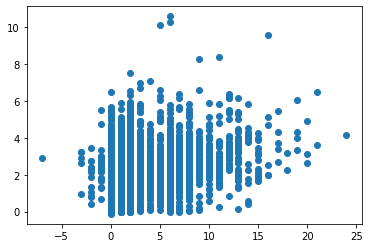

In [93]:
plt.scatter(y_test,y_pred)

# Trying to detect 5 players last 4-5 gameweeks

In [94]:
final_df

,name,assists,bps,clean_sheets,goals_scored,opponent_level,transfers_balance,was_home,saves,value,rolling_points,time,dreamteam_yearly_average,GW,total_points,kickoff_date,DEF,FWD,GK,MID
0,aaron connolly,0.0,11.6,0.2,0.4,1212.0,5854.4,0.4,0.0,45.0,3.4,13.8,7.0,9,1,2019-10-19,0.0,1.0,0.0,0.0
1,aaron connolly,0.0,12.0,0.2,0.4,1150.0,20014.8,0.4,0.0,45.0,3.4,13.8,7.0,10,8,2019-10-26,0.0,1.0,0.0,0.0
2,aaron connolly,0.4,16.2,0.2,0.4,1162.0,24890.8,0.4,0.0,45.2,4.8,13.8,7.0,11,2,2019-11-02,0.0,1.0,0.0,0.0
3,aaron connolly,0.4,16.4,0.4,0.4,1148.0,45102.4,0.6,0.0,45.4,5.0,13.6,7.0,12,1,2019-11-10,0.0,1.0,0.0,0.0
4,aaron connolly,0.4,15.0,0.4,0.4,1148.0,41238.2,0.6,0.0,45.8,5.0,13.6,7.0,13,0,2019-11-23,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107270,ørjan nyland,0.0,0.0,0.0,0.0,1200.0,-2618.2,0.6,0.0,40.0,0.0,17.0,0.0,35,0,2021-05-09,0.0,0.0,1.0,0.0
107271,ørjan nyland,0.0,0.0,0.0,0.0,1244.0,-2520.6,0.6,0.0,40.0,0.0,16.6,0.0,35,0,2021-05-13,0.0,0.0,1.0,0.0
107272,ørjan nyland,0.0,0.0,0.0,0.0,1220.0,-2457.4,0.8,0.0,40.0,0.0,17.2,0.0,36,0,2021-05-16,0.0,0.0,1.0,0.0
107273,ørjan nyland,0.0,0.0,0.0,0.0,1166.0,-2271.6,0.6,0.0,40.0,0.0,15.6,0.0,37,0,2021-05-19,0.0,0.0,1.0,0.0


In [138]:
#train_df = final_df[final_df.kickoff_date < pd.to_datetime('2021-05-07')]
#test_df = final_df[final_df.kickoff_date >= pd.to_datetime('2021-05-07')]

train_df = final_df[final_df.GW < 29]
test_df = final_df[final_df.GW >= 34]

test_df = test_df[test_df.kickoff_date > pd.to_datetime('2021-01-01')]

In [139]:
train_df.shape

(22597, 20)

In [140]:
test_df.shape

(2605, 20)

In [141]:
new_df=test_df[['name','total_points','GW']]

In [167]:
X_train=train_df.drop(columns=['total_points','name','GW','kickoff_date'])
y_train=train_df['total_points']

X_test=test_df.drop(columns=['total_points','name','GW','kickoff_date'])
y_test=test_df['total_points']

In [174]:
corrMatrix = train_df.corr()
print (corrMatrix)

                           assists       bps  clean_sheets  goals_scored  \
assists                   1.000000  0.474124      0.289273      0.324284   
bps                       0.474124  1.000000      0.689409      0.537718   
clean_sheets              0.289273  0.689409      1.000000      0.275636   
goals_scored              0.324284  0.537718      0.275636      1.000000   
opponent_level           -0.052287 -0.063648     -0.067500     -0.047259   
transfers_balance         0.215591  0.287573      0.221248      0.325423   
was_home                  0.005516  0.004028      0.007073      0.004394   
saves                    -0.069407  0.275912      0.131508     -0.071857   
value                     0.407194  0.347328      0.261594      0.512074   
rolling_points            0.556551  0.931317      0.724952      0.686168   
time                     -0.044202 -0.065565      0.037998     -0.044085   
dreamteam_yearly_average  0.328825  0.355546      0.228814      0.385535   
GW          

In [168]:
X_train.shape

(22597, 16)

In [169]:
X_test.shape

(2605, 16)

In [170]:
X_train.head()

,assists,bps,clean_sheets,goals_scored,opponent_level,transfers_balance,was_home,saves,value,rolling_points,time,dreamteam_yearly_average,DEF,FWD,GK,MID
0,0.0,11.6,0.2,0.4,1212.0,5854.4,0.4,0.0,45.0,3.4,13.8,7.0,0.0,1.0,0.0,0.0
1,0.0,12.0,0.2,0.4,1150.0,20014.8,0.4,0.0,45.0,3.4,13.8,7.0,0.0,1.0,0.0,0.0
2,0.4,16.2,0.2,0.4,1162.0,24890.8,0.4,0.0,45.2,4.8,13.8,7.0,0.0,1.0,0.0,0.0
3,0.4,16.4,0.4,0.4,1148.0,45102.4,0.6,0.0,45.4,5.0,13.6,7.0,0.0,1.0,0.0,0.0
4,0.4,15.0,0.4,0.4,1148.0,41238.2,0.6,0.0,45.8,5.0,13.6,7.0,0.0,1.0,0.0,0.0


In [171]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

reg = KNeighborsRegressor()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.3411132437619961

In [147]:
new_df['y_pred']=y_pred

<ipython-input-147-bc4f2e43be13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['y_pred']=y_pred


In [148]:
new_df[new_df['name']=='heung-min son']

,name,total_points,GW,y_pred
41001,heung-min son,12,34,4.932960
41002,heung-min son,7,35,5.331218
41003,heung-min son,3,36,5.531399
41004,heung-min son,2,37,5.844012
41005,heung-min son,5,38,5.771383


In [156]:
new_df[new_df['name']=='kyle walker']

,name,total_points,GW,y_pred
61606,kyle walker,0,34,2.510953
61607,kyle walker,0,35,2.309654
61608,kyle walker,1,36,2.505845
61609,kyle walker,0,37,1.755268
61610,kyle walker,6,38,2.057409


In [150]:
new_df[new_df['name']=='jesse lingard']

,name,total_points,GW,y_pred
50109,jesse lingard,2,34,2.895654
50110,jesse lingard,1,35,4.927746
50111,jesse lingard,2,36,3.629431
50112,jesse lingard,7,37,3.514016
50113,jesse lingard,3,38,2.806274


In [159]:
new_df[new_df['name']=='youri tielemans']

,name,total_points,GW,y_pred
106660,youri tielemans,2,34,2.950718
106661,youri tielemans,2,35,2.746597
106662,youri tielemans,5,35,2.671148
106663,youri tielemans,2,37,2.823404
106664,youri tielemans,2,38,3.064327


In [152]:
new_df[new_df['name']=='james justin']

,name,total_points,GW,y_pred
45538,james justin,0,34,0.243536
45539,james justin,0,35,0.260055
45540,james justin,0,35,0.283099
45541,james justin,0,37,0.216759
45542,james justin,0,38,0.223022


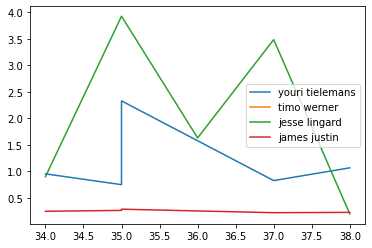

In [162]:
plt.plot(new_df[new_df['name']=='youri tielemans']['GW'],np.abs(new_df[new_df['name']=='youri tielemans']['y_pred']-new_df[new_df['name']=='youri tielemans']['total_points']),label='youri tielemans')
plt.plot(new_df[new_df['name']=='timo werner']['GW'],np.abs(new_df[new_df['name']=='timo werner']['y_pred']-new_df[new_df['name']=='timo werner']['total_points']),label='timo werner')
plt.plot(new_df[new_df['name']=='jesse lingard']['GW'],np.abs(new_df[new_df['name']=='jesse lingard']['y_pred']-new_df[new_df['name']=='jesse lingard']['total_points']),label='jesse lingard')
plt.plot(new_df[new_df['name']=='james justin']['GW'],np.abs(new_df[new_df['name']=='james justin']['y_pred']-new_df[new_df['name']=='james justin']['total_points']),label='james justin')

plt.legend()



In [172]:
player_dtya={}
for i,player in enumerate(new_df['name'].unique()):
    
    print(player,i)

aaron connolly 0
aaron cresswell 1
aaron mooy 2
aaron ramsdale 3
aaron wan-bissaka 4
abdoulaye doucouré 5
aboubakar kamara 6
adam forshaw 7
adam lallana 8
adam webster 9
adama traoré 10
ademola lookman 11
adrián san miguel del castillo 12
ahmed el mohamady 13
ainsley maitland-niles 14
albian ajeti 15
alex iwobi 16
alex mccarthy 17
alex oxlade-chamberlain 18
alexandre jankewitz 19
alexandre lacazette 20
alexis mac allister 21
alfie mawson 22
alireza jahanbakhsh 23
alisson ramses becker 24
allan saint-maximin 25
andreas christensen 26
andreas pereira 27
andrew robertson 28
andriy yarmolenko 29
andros townsend 30
andré filipe tavares gomes 31
andré-frank zambo anguissa 32
andy carroll 33
andy lonergan 34
angelo ogbonna 35
angus gunn 36
anthony driscoll-glennon 37
anthony gordon 38
anthony knockaert 39
anthony martial 40
antonio rüdiger 41
anwar el ghazi 42
arthur masuaku 43
ashley barnes 44
ashley westwood 45
axel tuanzebe 46
aymeric laporte 47
ayoze pérez 48
bailey peacock-farrell 49
bam

# Other stuff

In [63]:
def get_assists_per_game(df,player):
    ls=[0]
    assists=0
    num_games=0
    for i,row in df.iterrows():
        if row['minutes']>0:
            num_games+=1
            assists+=row['assists']
        if num_games>0:
            ls.append(assists/num_games)
        else:
            ls.append(0)
    del ls[-1]
    return ls[-1]

In [64]:
def get_goals_per_game(df,player):
    ls=[0]
    goals=0
    num_games=0
    for i,row in df.iterrows():
        if row['minutes']>0:
            num_games+=1
            goals+=row['goals_scored']
        if num_games>0:
            ls.append(goals/num_games)
        else:
            ls.append(0)
    del ls[-1]
    return ls[-1]

def get_clean_sheets_per_game(df,player):
    ls=[0]
    clean_sheets=0
    num_games=0
    for i,row in df.iterrows():
        if row['minutes']>0:
            num_games+=1
            clean_sheets+=row['clean_sheets']
        if num_games>0:
            ls.append(clean_sheets/num_games)
        else:
            ls.append(0)
    del ls[-1]
    return ls[-1]

def get_minutes_per_game(df,player):
    ls=[0]
    minutes=0
    num_games=0
    for i,row in df.iterrows():
        if row['minutes']>0:
            num_games+=1
            minutes+=row['minutes']
        if num_games>0:
            ls.append(minutes/num_games)
        else:
            ls.append(0)
    del ls[-1]
    return ls[-1]

In [65]:
X_raw.shape

NameError: name 'X_raw' is not defined

In [ ]:
assists_per_game=[]
goals_per_game=[]
clean_sheets_per_game=[]
minutes_per_game=[]

for i,player in enumerate(X_raw['name'].unique()):
    if i%100==0:
        print(player,i)
    assists_per_game+=get_assists_per_game(X_raw[X_raw['name']==player],player)
    goals_per_game+=get_goals_per_game(X_raw[X_raw['name']==player],player)
    clean_sheets_per_game+=get_clean_sheets_per_game(X_raw[X_raw['name']==player],player)
    minutes_per_game+=get_minutes_per_game(X_raw[X_raw['name']==player],player)

In [ ]:
X_raw['apg']=assists_per_game
X_raw['gpg']=goals_per_game
X_raw['cspg']=clean_sheets_per_game
X_raw['mpg']=minutes_per_game

In [ ]:
X_raw.columns

In [ ]:
X_raw.shape

In [ ]:
X_raw.drop(columns=['assists','bonus','bps','clean_sheets','element','fixture','goals_conceded','goals_scored'
                    ,'minutes','opponent_team','own_goals','penalties_missed','penalties_saved','red_cards','saves'
                    ,'selected','team_a_score','team_h_score','transfers_balance','transfers_in','transfers_out'
                    ,'value','yellow_cards','team_id','team_name','ict_index','influence','threat','creativity'],inplace=True) #Bonus, bps

In [ ]:
X_raw.shape

In [ ]:
X_raw.columns

In [ ]:
X_raw.head()